In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
import nltk
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder 
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import re
from collections import Counter
from nltk import ngrams
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
import tensorflow as tf
import numpy as np
from tabulate import tabulate
from tqdm import trange
import random
model_name = 'bert-base-uncased'
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)
tokenizer = BertTokenizer.from_pretrained(model_name)


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architect

In [2]:
df = pd.read_csv('updated.csv')
df.head()

text  \
0                effect edentulism spirometric tests   
1  multiple chronic diseases associated tooth los...   
2  knowledge attitudes practices patients healthc...   
3  asthma chronic obstructive pulmonary disease t...   
4  cohort study impact tooth loss periodontal dis...   

                                               text2  label  
0  impact denture wear edentulous subjects perfor...      1  
1  half us adults aged years lost least one perma...      0  
2  poor oral health associated worse clinical out...      0  
3  adults chronic respiratory conditions specific...      0  
4  copd patients fatal nonfatal respiratoryrelate...      0

In [3]:
df.replace("", float("NaN"), inplace=True)
df.dropna(inplace=True)
df.rename(columns = {"Title":"text", "Abstract":"text2", 'Label' : 'label'},inplace = True)
df

text  \
0                  effect edentulism spirometric tests   
1    multiple chronic diseases associated tooth los...   
2    knowledge attitudes practices patients healthc...   
3    asthma chronic obstructive pulmonary disease t...   
4    cohort study impact tooth loss periodontal dis...   
..                                                 ...   
192  Effects of tooth loss on brain structure: a vo...   
193  mandibular advancement combined horizontal adv...   
194  Impact of soft palate visibility and tongue po...   
195  Airway Phenotypes and Nocturnal Wearing of Den...   
196  Relationship between oral health, diabetes man...   

                                                 text2  label  
0    impact denture wear edentulous subjects perfor...      1  
1    half us adults aged years lost least one perma...      0  
2    poor oral health associated worse clinical out...      0  
3    adults chronic respiratory conditions specific...      0  
4    copd patients fatal nonfatal respiratoryrelate...      0  
..                                                 ...    ...  
192  Purpose: One of the most prominent issues in a...      0  
193  orthognathic surgical procedures used past tre...      1  
194  Background: Obstructive sleep apnea (OSA) was ...      0  
195  The objective of this study was to examine to ...      0  
196  Objectives: The aim of this study was to asses...      0  

[197 rows x 3 columns]

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df['text'].astype(str) + ' ' + df['text2'].astype(str)
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(' '.join(text))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [5]:
#lowercase, remove special characters

def cleansing(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'/(?<!\S).(?!\S)\s*/', '', text)
    return text

In [6]:
df['text'] = df['text'].apply(cleansing)
df['text2'] = df['text2'].apply(cleansing)
df


text  \
0                  effect edentulism spirometric tests   
1    multiple chronic diseases associated tooth los...   
2    knowledge attitudes practices patients healthc...   
3    asthma chronic obstructive pulmonary disease t...   
4    cohort study impact tooth loss periodontal dis...   
..                                                 ...   
192  effects of tooth loss on brain structure a vox...   
193  mandibular advancement combined horizontal adv...   
194  impact of soft palate visibility and tongue po...   
195  airway phenotypes and nocturnal wearing of den...   
196  relationship between oral health diabetes mana...   

                                                 text2  label  
0    impact denture wear edentulous subjects perfor...      1  
1    half us adults aged years lost least one perma...      0  
2    poor oral health associated worse clinical out...      0  
3    adults chronic respiratory conditions specific...      0  
4    copd patients fatal nonfatal respiratoryrelate...      0  
..                                                 ...    ...  
192  purpose one of the most prominent issues in a ...      0  
193  orthognathic surgical procedures used past tre...      1  
194  background obstructive sleep apnea osa was est...      0  
195  the objective of this study was to examine to ...      0  
196  objectives the aim of this study was to assess...      0  

[197 rows x 3 columns]

In [7]:
df.to_csv("clean.csv", index=False)

In [7]:
#remove stopwords 
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['text2'] = df['text2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df

text  \
0                  effect edentulism spirometric tests   
1    multiple chronic diseases associated tooth los...   
2    knowledge attitudes practices patients healthc...   
3    asthma chronic obstructive pulmonary disease t...   
4    cohort study impact tooth loss periodontal dis...   
..                                                 ...   
192  effects tooth loss brain structure voxelbased ...   
193  mandibular advancement combined horizontal adv...   
194  impact soft palate visibility tongue position ...   
195  airway phenotypes nocturnal wearing dentures e...   
196  relationship oral health diabetes management s...   

                                                 text2  label  
0    impact denture wear edentulous subjects perfor...      1  
1    half us adults aged years lost least one perma...      0  
2    poor oral health associated worse clinical out...      0  
3    adults chronic respiratory conditions specific...      0  
4    copd patients fatal nonfatal respiratoryrelate...      0  
..                                                 ...    ...  
192  purpose one prominent issues superaging societ...      0  
193  orthognathic surgical procedures used past tre...      1  
194  background obstructive sleep apnea osa estimat...      0  
195  objective study examine extent anatomic charac...      0  
196  objectives aim study assess relationship tooth...      0  

[197 rows x 3 columns]

In [8]:
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) 
    text = re.sub(r'\s+', ' ', text)  
    return text.strip()

# Apply text preprocessing to 'text' and 'text2' columns
df['text'] = df['text'].apply(preprocess_text)
df['text2'] = df['text2'].apply(preprocess_text)

print(df.dtypes)

text     object
text2    object
label     int64
dtype: object


In [9]:
df


text  \
0                  effect edentulism spirometric tests   
1    multiple chronic diseases associated tooth los...   
2    knowledge attitudes practices patients healthc...   
3    asthma chronic obstructive pulmonary disease t...   
4    cohort study impact tooth loss periodontal dis...   
..                                                 ...   
192  effects tooth loss brain structure voxelbased ...   
193  mandibular advancement combined horizontal adv...   
194  impact soft palate visibility tongue position ...   
195  airway phenotypes nocturnal wearing dentures e...   
196  relationship oral health diabetes management s...   

                                                 text2  label  
0    impact denture wear edentulous subjects perfor...      1  
1    half us adults aged years lost least one perma...      0  
2    poor oral health associated worse clinical out...      0  
3    adults chronic respiratory conditions specific...      0  
4    copd patients fatal nonfatal respiratoryrelate...      0  
..                                                 ...    ...  
192  purpose one prominent issues superaging societ...      0  
193  orthognathic surgical procedures used past tre...      1  
194  background obstructive sleep apnea osa estimat...      0  
195  objective study examine extent anatomic charac...      0  
196  objectives aim study assess relationship tooth...      0  

[197 rows x 3 columns]

In [10]:
X = df[['text', 'text2']] 
y = df['label']  

#label encoder
label_encoder = LabelEncoder()
X['text'] = label_encoder.fit_transform(X['text'])
X['text2'] = label_encoder.fit_transform(X['text2'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (157, 2) (157,)
Test set shape: (40, 2) (40,)


C:\Users\User\AppData\Local\Temp\ipykernel_11508\3158477982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text'] = label_encoder.fit_transform(X['text'])
C:\Users\User\AppData\Local\Temp\ipykernel_11508\3158477982.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text2'] = label_encoder.fit_transform(X['text2'])


In [11]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)
print("Oversampled Train set shape:", X_train_oversampled.shape, y_train_oversampled.shape)

Oversampled Train set shape: (240, 2) (240,)


In [12]:
df_oversampled = pd.DataFrame(X_train_oversampled, columns=['text', 'text2'])
df_oversampled['label'] = y_train_oversampled

# Print the shape of the oversampled training set
print("Oversampled Train set shape:", df_oversampled.shape)

Oversampled Train set shape: (240, 3)


In [13]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset
import torch


class CustomDataset(Dataset):
    def __init__(self, texts, text2s, labels):
        self.texts = texts
        self.text2s = text2s
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        text = self.texts[index]
        text2 = self.text2s[index]
        label = self.labels[index]
        return text, text2, label


# Initialize the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenize the text and convert it into input tensors
def tokenize_function(texts, text2s):
    inputs = tokenizer.batch_encode_plus(
        list(zip(texts, text2s)),
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    return inputs

train_texts = df_oversampled['text'].tolist()
train_text2s = df_oversampled['text2'].tolist()
train_labels = df_oversampled['label'].tolist()

train_texts = [str(text) for text in train_texts]
train_text2s = [str(text2) for text2 in train_text2s]

train_dataset = CustomDataset(train_texts, train_text2s, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Set the device for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


optimizer = AdamW(model.parameters(), lr=2e-5)

model.train()
for epoch in range(10):
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    for step, batch in enumerate(train_dataloader):
        texts, text2s, labels = batch

        inputs = tokenize_function(texts, text2s)
        inputs = {key: val.to(device) for key, val in inputs.items()}
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        total_loss += loss.item()

        _, predicted_labels = torch.max(logits, dim=1)
        correct_predictions += torch.sum(predicted_labels == labels).item()
        total_predictions += labels.size(0)

        loss.backward()
        optimizer.step()

        if (step + 1) % 100 == 0:
            accuracy = correct_predictions / total_predictions
            avg_loss = total_loss / (step + 1)
            print(f'Step {step + 1} - Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}')

    accuracy = correct_predictions / total_predictions
    avg_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1} - Average Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}')

model.save_pretrained('bert')
tokenizer.save_pretrained('tokenizer')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1 - Average Loss: 0.7121 - Accuracy: 0.4750
Epoch 2 - Average Loss: 0.6794 - Accuracy: 0.5708
Epoch 3 - Average Loss: 0.6439 - Accuracy: 0.6208
Epoch 4 - Average Loss: 0.5811 - Accuracy: 0.7042
Epoch 5 - Average Loss: 0.5705 - Accuracy: 0.6917
Epoch 6 - Average Loss: 0.4863 - Accuracy: 0.7750
Epoch 7 - Average Loss: 0.3741 - Accuracy: 0.8333
Epoch 8 - Average Loss: 0.2712 - Accuracy: 0.9125
Epoch 9 - Average Loss: 0.2580 - Accuracy: 0.9125
Epoch 10 - Average Loss: 0.2566 - Accuracy: 0.9000


('tokenizer\\tokenizer_config.json',
 'tokenizer\\special_tokens_map.json',
 'tokenizer\\vocab.txt',
 'tokenizer\\added_tokens.json')

In [14]:
from sklearn.metrics import classification_report

# ...

model.eval()
y_true = []
y_pred = []

for step, batch in enumerate(train_dataloader):
    texts, text2s, labels = batch

    inputs = tokenize_function(texts, text2s)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model(**inputs, labels=labels)
        logits = outputs.logits

    _, predicted_labels = torch.max(logits, dim=1)

    y_true.extend(labels.detach().cpu().numpy())
    y_pred.extend(predicted_labels.detach().cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       120
           1       0.97      0.99      0.98       120

    accuracy                           0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240



Text(50.722222222222214, 0.5, 'Truth')

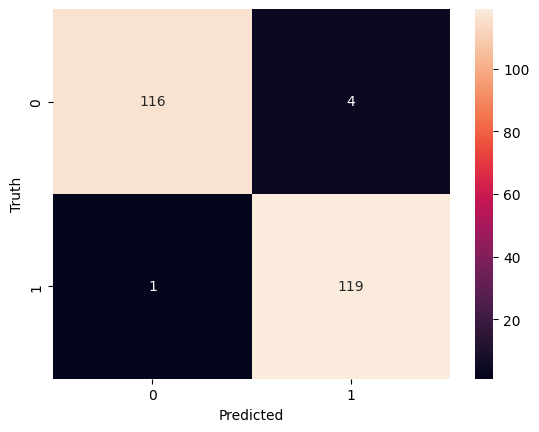

In [15]:
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset
import torch

class CustomDataset(Dataset):
    def __init__(self, texts, text2s, labels):
        self.texts = texts
        self.text2s = text2s
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        text = self.texts[index]
        text2 = self.text2s[index]
        label = self.labels[index]
        return text, text2, label


# Initialize the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenize the text and convert it into input tensors
def tokenize_function(texts, text2s):
    inputs = tokenizer.batch_encode_plus(
        list(zip(texts, text2s)),
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    return inputs

train_texts = df_oversampled['text'].tolist()
train_text2s = df_oversampled['text2'].tolist()
train_labels = df_oversampled['label'].tolist()

train_texts = [str(text) for text in train_texts]
train_text2s = [str(text2) for text2 in train_text2s]

train_dataset = CustomDataset(train_texts, train_text2s, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Set the device for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

# Early stopping parameters
early_stopping_epochs = 15
best_loss = float('inf')
best_model = None
epochs_without_improvement = 0

model.train()
for epoch in range(32):
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    for step, batch in enumerate(train_dataloader):
        texts, text2s, labels = batch

        inputs = tokenize_function(texts, text2s)
        inputs = {key: val.to(device) for key, val in inputs.items()}
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        total_loss += loss.item()

        _, predicted_labels = torch.max(logits, dim=1)
        correct_predictions += torch.sum(predicted_labels == labels).item()
        total_predictions += labels.size(0)

        loss.backward()
        optimizer.step()

        if (step + 1) % 100 == 0:
            accuracy = correct_predictions / total_predictions
            avg_loss = total_loss / (step + 1)
            print(f'Step {step + 1} - Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}')

    accuracy = correct_predictions / total_predictions
    avg_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1} - Average Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}')

    # Check if validation loss has improved
    if avg_loss < best_loss:
        best_loss = avg_loss
        best_model = model.state_dict()
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    # Stop training if there have been no improvements for a certain number of epochs
    if epochs_without_improvement >= early_stopping_epochs:
        print(f'Early stopping. No improvement in {early_stopping_epochs} epochs.')
        break

# Save the best model and tokenizer
torch.save(best_model, 'best_model')
tokenizer.save_pretrained('tokenizer')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1 - Average Loss: 0.6980 - Accuracy: 0.5341
Epoch 2 - Average Loss: 0.6577 - Accuracy: 0.6250
Epoch 3 - Average Loss: 0.5786 - Accuracy: 0.7330
Epoch 4 - Average Loss: 0.5192 - Accuracy: 0.7557
Epoch 5 - Average Loss: 0.5043 - Accuracy: 0.7614
Epoch 6 - Average Loss: 0.4377 - Accuracy: 0.8011
Epoch 7 - Average Loss: 0.3957 - Accuracy: 0.8239
Epoch 8 - Average Loss: 0.2939 - Accuracy: 0.9091
Epoch 9 - Average Loss: 0.2533 - Accuracy: 0.8920
Epoch 10 - Average Loss: 0.1847 - Accuracy: 0.9261
Epoch 11 - Average Loss: 0.1461 - Accuracy: 0.9489
Epoch 12 - Average Loss: 0.1814 - Accuracy: 0.9432
Epoch 13 - Average Loss: 0.1255 - Accuracy: 0.9545
Epoch 14 - Average Loss: 0.0746 - Accuracy: 0.9773
Epoch 15 - Average Loss: 0.0481 - Accuracy: 0.9886
Epoch 16 - Average Loss: 0.0787 - Accuracy: 0.9716
Epoch 17 - Average Loss: 0.0404 - Accuracy: 0.9886
Epoch 18 - Average Loss: 0.0222 - Accuracy: 0.9943
Epoch 19 - Average Loss: 0.0421 - Accuracy: 0.9886
Epoch 20 - Average Loss: 0.0177 - Accura

('tokenizer\\tokenizer_config.json',
 'tokenizer\\special_tokens_map.json',
 'tokenizer\\vocab.txt',
 'tokenizer\\added_tokens.json')

In [46]:
from sklearn.metrics import classification_report

model.eval()
y_true = []
y_pred = []

for step, batch in enumerate(train_dataloader):
    texts, text2s, labels = batch

    inputs = tokenize_function(texts, text2s)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model(**inputs, labels=labels)
        logits = outputs.logits

    _, predicted_labels = torch.max(logits, dim=1)

    y_true.extend(labels.detach().cpu().numpy())
    y_pred.extend(predicted_labels.detach().cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      1.00      0.99        88

    accuracy                           0.99       176
   macro avg       0.99      0.99      0.99       176
weighted avg       0.99      0.99      0.99       176



In [47]:
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(50.722222222222214, 0.5, 'Truth')